# Exploring and Comparing the Traditional and Modern Hospitality Industry

## Author : Tanya Gupta

Hospitality industry has been known for years by the traditional lavish hotels that provide luxury rooms and services. This type and extent of hospitality has always required the customers to spend ample money to make the most of these hotels. It is very common to come across different types and tiers of hotels spread across almost every region throughout the world. Hotel owners tend to be very competititive to prove that their services are worth the buck. Given the immense competition that already existed in the hopsitality industry, airbnb emerged as a novel concept that provided much better services and rather experiences at affordable rates. This article focuses on comparing hotels and airbnbs in the United States to understand the affect of modernization of the hositalty industry on the traditional existing hotels.

The datasets for performing inidividual and comparitive analyses have been obtained from Kaggle. An image has also been used from the internet
* Primary Dataset: Hotel Booking Demand - https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv
* US Airbnb Open data - https://www.kaggle.com/kritikseth/us-airbnb-open-data
* Image - https://qz.com/779121/airbnb-vs-hotel-cost-comparison-you-can-rent-an-entire-home-on-airbnb-for-the-price-of-a-hotel-room/

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import traitlets
import ipywidgets
import bqplot
from bqplot import pyplot
%matplotlib inline

In C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\matplotlib\mpl-d

In [3]:
hotels = pd.read_csv('https://raw.githubusercontent.com/tanyagupta55/tanyagupta55.github.io/master/hotel_bookings.csv')

## Preprocessing

In [4]:
usa_hotels = hotels[hotels['country'] == 'USA']

In [5]:
arrival_date_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
usa_hotels['arrival_date_month'] = pd.Categorical(usa_hotels['arrival_date_month'], categories=arrival_date_month, ordered=True)
usa_hotels.sort_values(by='arrival_date_month',ascending=True,inplace=True) 


# Idea to arrange months in ascending order inspired by https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name

C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tanya Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Interactive Plot for understanding different aspects of Hotel Booking demand in the United States

In [6]:

@ipywidgets.interact(colormap = plt.colormaps(), sym_log = True)
def hotel_plot(x_axis = ['arrival_date_month','arrival_date_week_number','arrival_date_day_of_month', 'customer_type','distribution_channel'], y_axis = ['adr', 'total_of_special_requests','deposit_type','adults', 'stays_in_weekend_nights','stays_in_week_nights'], colormap = 'ocean_r'):
    fig, ax = plt.subplots(1,1,figsize = (20,15))
    plt.scatter(usa_hotels[x_axis], usa_hotels[y_axis], c = np.log10(usa_hotels['arrival_date_day_of_month']), cmap = colormap)
    plt.colorbar()
    plt.show()
    

interactive(children=(Dropdown(description='x_axis', options=('arrival_date_month', 'arrival_date_week_number'…

The plot above is very helpful in understanding the crucial aspects of hotel booking demand in an interactive way.
You are provided with two drop-down lists that help in selecting the response and explanatory variables to understand the relationship between two variables and gain necessary insights about hotel booking demand. Another drop-down list is provided to choose the color scheme of your wish. This plot aids in understanding the different ways in which customer demand can be interpreted against various measures of time including month, week number and day of the month, customer type and distribution channel involved in obtaining a customer. The visualization seeks to analyze demand in terms of the weekend and week night stays at the hotel by the customers, Average Daily Rate (adr) which is defined as the ratio of sum of all the lodging transactions and the number of staying nights, number of adults that are attached to a booking, number of special requests under a booking which signifies that the customer is willing to use special services of the hotel as a sign of trust and appreciation of the services and lastly, by the role of deposit and refunds attached to a booking indicating the trust and loyalty of the customers who have made the booking. Therefore, the intricate details pertaining to hotel booking demand, projected profits and overall industry status can be evaluated by interacting with this visualization. This plot can enable hotel owners to understand behavioral, psychological and time-related trends of customers with resoect to hotels helping them to strategize their resources and services in a way that attracts most customers through marketing and advertisements when the time and other external factors are right.

# Interactive Heat Map and Bar Plot to perform focused and annual Demand analysis of US Hotel Bookings

## Preprocessing

In [7]:
list_ = []

for i in range(len(usa_hotels['customer_type'].unique())):
    df = usa_hotels.loc[usa_hotels['customer_type'] == usa_hotels['customer_type'].unique()[i]]
    for j in range(len(usa_hotels['arrival_date_year'].unique())):
        sum_ = df.loc[df['arrival_date_year'] == usa_hotels['arrival_date_year'].unique()[j], 'stays_in_week_nights'].sum()
        
        list_.append([usa_hotels['customer_type'].unique()[i],usa_hotels['arrival_date_year'].unique()[j],sum_])

In [8]:
customer_type = pd.DataFrame(list_,columns = ['customer_type','arrival_date_year','stays_in_week_nights'])

In [9]:
weeks = np.asarray(customer_type['stays_in_week_nights'])

In [10]:
week_stays = np.asarray(customer_type['stays_in_week_nights'])
week_stays= week_stays.reshape(3,4)

In [11]:
repeat_guest = usa_hotels.groupby('is_repeated_guest').sum().reset_index()

In [12]:
week_stay = np.asarray(repeat_guest['stays_in_week_nights'])

## Bar Plot

In [13]:
fig_l = bqplot.pyplot.figure(title='Total Weekday Night Stays per Status of Guest Repitition')
axes_options_1 = {'x': {'label': 'Status of Guest Repitition'},
                'y': {'label': 'Total Weekday Night Stays', 'tick_format': '0.0f'}}
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
line = bqplot.pyplot.bar(x = repeat_guest['is_repeated_guest'], y = weeks, axes_options = axes_options_1, scales = {'x':x_sc, 'y':y_sc})
fig_l

Figure(axes=[Axis(label='Status of Guest Repitition', scale=OrdinalScale()), Axis(label='Total Weekday Night S…

The bar plot created is one of the components of the final dashboard. Based on the input received from the heat map about the total number of weekday night stays, this visualization gives the distribution of the guests that are new or repetitive against the total number of weekday nights stayed in hotels by these two categories of guests. This plot helps in understanding how many new guests have been attracted by hotels to stay in during weekdays and how many loyal customers have opted to stay in on weekday nights, helping hotels to either implement loyalty base schemes to attract more loyal customers or implement strategies to pull in more new customers based on the distribution obtained and overall target of the hotels.

## Introducing Interactivity

In [14]:
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = week_stays[i,j] # this is a 2d array!!
        mySelectedLabel.value = 'The total number of Week Night Stays for a particular customer type and arrival year is ' + str(v)
        line.y = weeks[i:j]

## Heat Map

In [15]:
from bqplot import pyplot
# 2. scales - linear scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Customer Type')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Arrival Year')
ax_col = bqplot.ColorAxis(scale = c_sc, orientation='vertical', side='right') 
# 4. Marks
heat_map = bqplot.GridHeatMap(color = week_stays, #change
                              row = customer_type['arrival_date_year'].unique(), #change
                              column = customer_type['customer_type'].unique(), #change
                              scales = {'color':c_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
                             #selected_style={'opacity':1.0},
                             #unselected_style={'opacity':0.8})


heat_map.observe(on_selected, 'selected')
        
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
#fig

# dashboard with my label
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

The Heat Map obtained is the second component in the final dashboard. You can click on the boxes within the Heat Map to obtain insights from it and control the insights of the bar plot as the output number of weekday night stays at hotel obtained from each box within the Heat Map controls the input number of weekday night stays at hotels represented on the y-axis of the bar plot. In this Heat Map, output related to the total number of weekday night stays at hotel is obtained for a particular customer type and a particular year. Thus, you can easily compare the traffic of each customer type for each year that hotels witnessed.

## Final Dashboard

In [16]:
# mess with some layout parameters (look a little like CSS stylings)
fig.layout.min_width='500px'
fig_l.layout.min_width='500px'


figures = ipywidgets.HBox([fig, fig_l]) # figures side-by-side


# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

The bar plot on the right is controlled by the Heat Map on the left in this dashboard. By selecting a box of interest within the Heat Map grid, you can analyze the total nuber ofweekday night stays by customers against three different variables. The visualization above is a more focused version of the first interactive visualization with some already represented aspects and some newly introduced ones. The yearly aspect of time has been introduced and compared against the customer type on the left to see which customer type spent how many total week nights at hotels in a particular year. This gives a very dedicated and exceptional scenario of the customer types that are extremely loyal who tend to spend the most unusual periods of time at hotels (week nights). On the right, you can dive deep into how many repeated guests stay over at the hotels for week nights. This visualization can help in tapping the most loyal customers by giving them unbelievable discounts and reward points to maintain their loyalty towards specific hotels. 

# Contextual Visualizations

## Contextual Visualization using another dataset

In [17]:
airbnb_1 = pd.read_csv('https://raw.githubusercontent.com/tanyagupta55/tanyagupta55.github.io/master/half_AIRBNB.csv')
airbnb_2 = pd.read_csv('https://raw.githubusercontent.com/tanyagupta55/tanyagupta55.github.io/master/half_AIRBNB_2.csv')

In [18]:
airbnb = airbnb_1.join(airbnb_2, how = 'left')

## Analysis of Average number of minimum nights spent in each Room Type of Airbnb in the United States v/s Average number of weekday and week nights spent in each Hotel Type in the United States

In [19]:
hotel_type = usa_hotels.groupby('hotel').mean().reset_index()

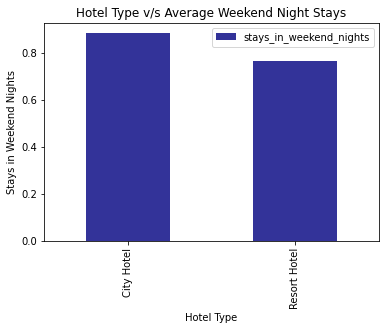

In [20]:
hotel_type.plot(x = 'hotel', y = 'stays_in_weekend_nights', kind = 'bar', colormap = 'terrain')
plt.xlabel('Hotel Type')
plt.ylabel('Stays in Weekend Nights')
plt.title('Hotel Type v/s Average Weekend Night Stays')
plt.show()

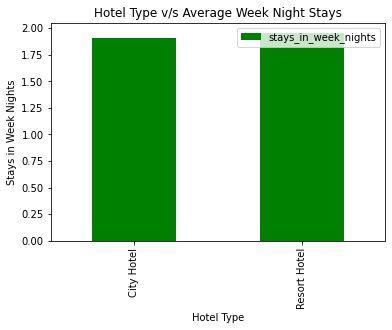

In [21]:
hotel_type.plot(x = 'hotel', y = 'stays_in_week_nights', kind = 'bar', colormap = 'ocean')
plt.xlabel('Hotel Type')
plt.ylabel('Stays in Week Nights')
plt.title('Hotel Type v/s Average Week Night Stays')
plt.show()

The two visualizations above seek to analyze the number of average night stays in the week and weekend pertaining to each hotel type. They indicate the relative demand for each hotel type and the extent to which customers perfer to stay in hotel rooms.

In [22]:
room_type = airbnb.groupby('room_type').mean().reset_index()

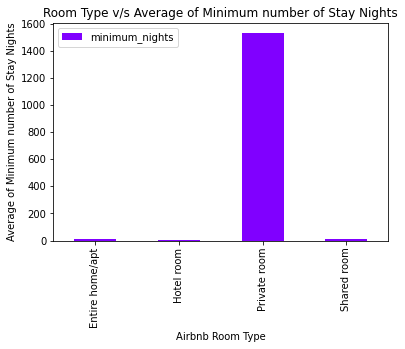

In [23]:
room_type.plot(x = 'room_type', y = 'minimum_nights', kind = 'bar', colormap = 'rainbow')
plt.xlabel('Airbnb Room Type')
plt.ylabel('Average of Minimum number of Stay Nights')
plt.title('Room Type v/s Average of Minimum number of Stay Nights')
plt.show()

The visualization above indicates the distinct demand for different airbnb rooms by customers and how much do customers prefer to stay in airbnb rooms. 

After understanding in-depth about the various ways to evaluate hotel booking demand, it is also necessary to consider the factor of competition. In earlier times, different hotel owners were involved in a tough competition with each other to attract new customers. With the flow of new ideas in the market and their smooth implementation through technological advances, the concept of Airbnb was introduced in the hospitality industry. It sought to bring together anyone who owned properties they were willing to publish as stay rooms for customers/travellers in different parts of the world. The idea was to convert every potential property into a room that could provide great variety of experiences to the people travelling, with the consent and willingness of the property owners. The major aim was to make each property owner a part of the Airbnb family who could now earn with many others like them binded by this one application that brought together all the different stay rooms. The high volume of rooms registered with airbnb helps in providing the rooms at very affordable rates to customers in need of rooms for staying in. This concept disrupted the idea of luxurious hotels with services being provided at exorbitant rates and repitition of customer experience with similar looking and feeling rooms. 

This fact is evident in the visualizations above where it is clearly noticable how the average number of nights spent on weekends and weekdays by hotel customers in different hotel types in the United States is very less comapred to the average of minimum number of nights spent by airbnb customers in different room types in the United States. Also, it is worth noting that the Hotel Data is spread across three years from 2015 to 2017 while the Airbnb data is restricted to the year 2020. Thus, it can be seen that the demand for Airbnb is clearly high compared to traditional hotels.

## Contextual Visualization using an image with relevant visualization from the internet

## Comparison of Airbnb and Hotel Prices in some Touristy spots in United States

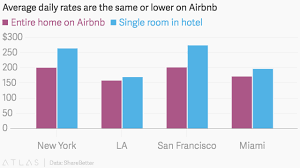

In [24]:
from IPython.display import Image
Image("airbnb_hotel_prices_US.png", width = 500, height =300)

The visualization above seeks to compare the prices of single hotel rooms and airbnb properties for staying in at various prime, touristy locations of United States. It is clear from the visualization that Airbnb is more affordable and provides much more for each buck than hotels. The visualization here supports the reason for increasingly high demand for airbnb stays instead of hotel stays amongst travellers, tourists and general customers. The price for an entire property listed under airbnb is cheaper than a single room stay at a hotel. Thus, airbnb uses volume as a trade-off for costs, providing rich and unforgettable experiences compared to hotel rooms at much cheaper rates. Therefore, it can be observed that modernization of the hospitality industry has to a great extent uprooted the traditional hospitality industry that is struggling to keep up. Despite the highly luxurious services, resources and infrastructure, people are turning towards Airbnb just because it attracts volumes of people thorugh afforadbility, feasibility and uniqueness. Looking into past trends of the traditional hotel booking demand is no more enough for hotels to create strategies and procure resources for increasing revenue and profits. It is necessary to think out-of-the-box and introduce a win-win strategy that benefits both the provider and consumer is the best possible manner. 

## References:
* Primary Dataset: Hotel Booking Demand - https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv
* US Airbnb Open data - https://www.kaggle.com/kritikseth/us-airbnb-open-data
* Image - https://qz.com/779121/airbnb-vs-hotel-cost-comparison-you-can-rent-an-entire-home-on-airbnb-for-the-price-of-a-hotel-room/
* https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name
* bqplot documentation
* pandas documentation
* numpy documentation
* ipywidgets documentation
* matplotlib documentation